# 방범용cctv 위치와 인구 데이터 분석
- https://data.busan.go.kr/bdip/opendata/detail.do?publicdatapk=15082060&searchKeyword=%EB%B0%A9%EB%B2%94%EC%9A%A9%20cctv&searchOption=OR&from=dsh&uuid=e77dda0e-96aa-4592-99a4-efd90f6e7888#n
- 파일데이터 '부산광역시_방범용 CCTV 정보_20230622.CSV' 다운로드
- 목표: cctv 수와 인구대비 비율을 파악
- 인구대비 cctv의 평균치를 확인하고 그로부터 cctv가 과하게 부족한 구를 확인

In [1]:
import pandas as pd
file_path ='./ref/부산광역시방범용CCTV 정보20230622.csv'
CCTV = pd.read_csv(file_path,encoding='EUC-KR')
CCTV

,CCTV 명칭,CCTV 좌표,CCTV 그룹
0,(10차)강서-10-232-1죽동동381가락송산마을(고1),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
1,(10차)강서-10-232-2죽동동381가락송산마을(고2),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
2,(10차)강서-10-233-1대저2동3147근린공원(고1),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
3,(10차)강서-10-233-2대저2동3147근린공원(고2),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
4,(10차)강서-10-235-2대저2동2041-40덕두시장,"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
...,...,...,...
6100,반여동_수협_맞은편,"10.1.12.28:0:0:0:0:0:0,10.1.12.28:9400:",해운대-폐공가
6101,양지빌라_뒤골목,"10.1.12.28:0:0:0:0:0:0,10.1.12.28:9400:",해운대-폐공가
6102,영진약국앞_사거리,"10.1.12.28:0:0:0:0:0:0,10.1.12.28:9400:",해운대-폐공가
6103,한신휴플러스_주변,"10.1.12.28:0:0:0:0:0:0,10.1.12.28:9400:",해운대-폐공가


In [2]:
# CCTV.columns = ['x','xx','local']
cctv = CCTV.rename(columns={'CCTV 그룹':'local'})['local']
cctv.value_counts()

local
동래-15차     58
사하-15차     55
강서-9차      54
해운대-11차    53
기장-9차      48
           ..
기장-12차      5
남구-10차      5
북구-10차      4
기장-1차       2
중구-구방범      2
Name: count, Length: 256, dtype: int64

In [3]:
# 방법1
cctv = cctv.apply(lambda x: x.split('-')[0])

# 방법2
# local_list = []
# for v in cctv:
#     local_list.append(v.split('-')[0])
# cctv = pd.Series(local_list)

# 방법 3
# cctv = cctv.str.

cctv = cctv.value_counts()
cctv = cctv.reset_index()

In [4]:
cctv.sample(3)

,local,count
12,남구,351
5,북구,403
4,금정,403


- 행정동별 연령별 인구현황
- https://jumin.mois.go.kr/ageStatMonth.do<br>
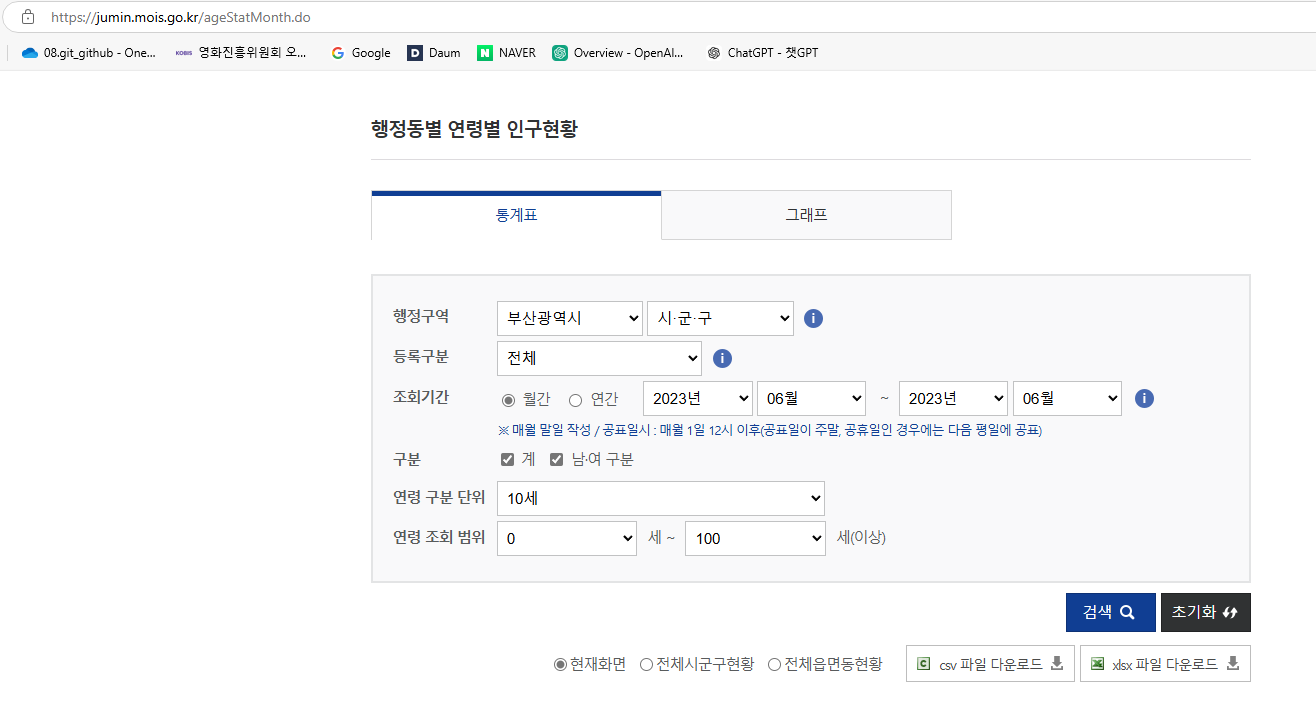

In [5]:
import pandas as pd
import warnings
warnings.simplefilter('ignore', UserWarning)
file_path2 = './ref/연령별인구현황월간202306.xlsx'
ori = pd.read_excel(file_path2,sheet_name='연령별인구현황',skiprows=3)
ori

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,2600000000,부산광역시,"3,306,993","3,306,993","200,627","264,771","386,558","393,792","489,807","539,964",...,"128,872","187,837","191,071","242,526","276,337","296,378","172,706","87,000","13,119",384
1,2611000000,부산광역시 중구,"39,311","39,311",931,"1,773","5,638","4,310","4,582","6,423",...,914,"2,964","2,037","2,096","3,078","4,109","2,877","1,532",251,15
2,2614000000,부산광역시 서구,"104,449","104,449","5,060","7,063","12,272","10,400","13,778","16,812",...,"3,447","6,366","5,059","6,730","8,260","10,223","7,044","3,969",632,12
3,2617000000,부산광역시 동구,"86,809","86,809","3,903","4,636","9,480","10,598","11,324","13,941",...,"2,254","4,847","4,991","5,212","6,703","8,376","6,120","3,566",494,10
4,2620000000,부산광역시 영도구,"107,006","107,006","4,364","6,815","10,089","9,716","13,733","17,687",...,"3,324","4,551","4,448","6,540","8,538","11,533","8,255","4,438",601,17
5,2623000000,부산광역시 부산진구,"357,475","357,475","19,405","24,054","49,960","49,256","49,715","55,808",...,"11,921","26,314","24,077","24,451","28,682","31,317","18,484","9,708","1,324",31
6,2626000000,부산광역시 동래구,"272,590","272,590","18,893","25,485","29,383","31,940","43,738","43,823",...,"12,258","14,375","15,878","22,379","22,669","23,413","13,415","6,220",969,28
7,2629000000,부산광역시 남구,"255,786","255,786","14,568","22,340","32,784","26,678","38,448","41,257",...,"10,895","15,450","12,933","19,212","20,859","22,318","14,312","6,963",958,29
8,2632000000,부산광역시 북구,"276,684","276,684","16,736","21,609","31,476","33,069","37,773","49,562",...,"10,432","14,743","15,645","18,731","26,357","26,262","12,752","6,459","1,005",35
9,2635000000,부산광역시 해운대구,"383,355","383,355","24,071","35,804","41,691","42,119","60,575","67,383",...,"17,293","19,949","21,383","31,709","35,383","32,640","18,247","9,638","1,534",48


In [6]:
cctv

,local,count
0,사하,431
1,사상,422
2,해운대,418
3,동래,404
4,금정,403
5,북구,403
6,진구,395
7,영도,381
8,연제,377
9,동구,374


In [7]:
data = ori[['행정기관','총 인구수']]
data.columns = ['local','population']
# 0 부산광역시	3,306,993 총 계를 없애버림
data = data.loc[1:] 
data['local'] = data['local'].apply(lambda x: x.replace('부산광역시 ',''))
# data.replace('부산광역시 ','')
data = data.reset_index(drop='True') # drop='True'는 기존 인덱스를 삭제하고 새롭게 부여
data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도구,"107,006"
4,부산진구,"357,475"
5,동래구,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대구,"383,355"
9,사하구,"300,922"


In [8]:
# total = pd.concat([cctv,data], axis = 1)

# # 방법1
# total.columns = ['local','count','localx','popluation']
# total = total.drop(columns=['localx'])
# # 방법2
# # total = total.drop(total.columns=[2],axis = 1) # 이름이 같을 경우 인덱스가 사용되지 않음 지울 아이가 있다면 컬럼 이름은 유일해야한다

# total

In [14]:
# 공백 조심 data['local'] = data['local'].apply(lambda x: len(x))
data['local'] = data['local'].apply(lambda x: x.replace('구','').replace('군','').replace('부산진','진구').strip() if len(x.strip()) > 2 else x.strip())
data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도,"107,006"
4,진구,"357,475"
5,동래,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대,"383,355"
9,사하,"300,922"


In [28]:
total = pd.merge(cctv, data, on='local')
total['population']=total['population'].str.replace(',','').astype(int)
total = total.sort_values(by='population',ascending=False)
total = total.set_index('local') # 중요함.
total

,count,population
local,,
해운대,418,383355
진구,395,357475
사하,431,300922
북구,403,276684
동래,404,272590
남구,351,255786
금정,403,218711
사상,422,203029
연제,377,202919


Text(0.3, 0.3, '한글')

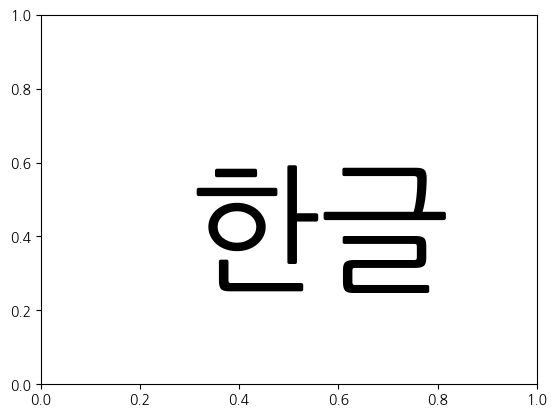

In [29]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font',family="NanumGothic")
plt.text(0.3,0.3,'한글',size=100)

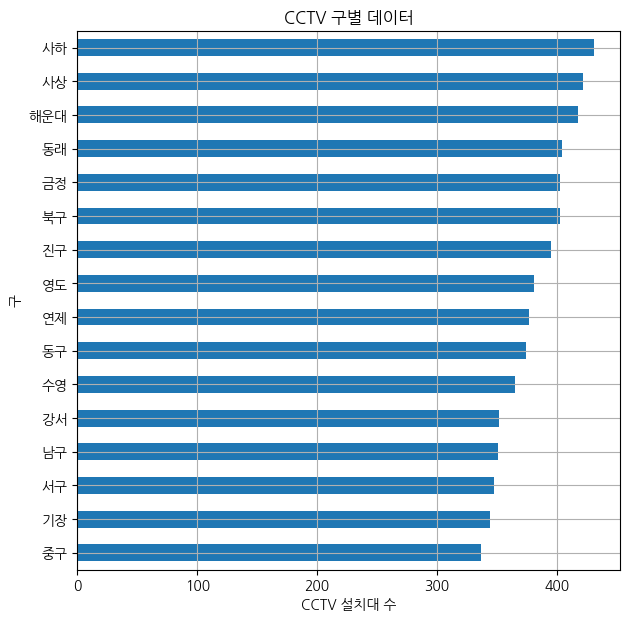

In [31]:
# plt.figure()
total['count'].sort_values().plot(kind='barh',grid=True,figsize=(7,7), ylabel='구')

plt.title('CCTV 구별 데이터')
plt.xlabel('CCTV 설치대 수')
plt.show()

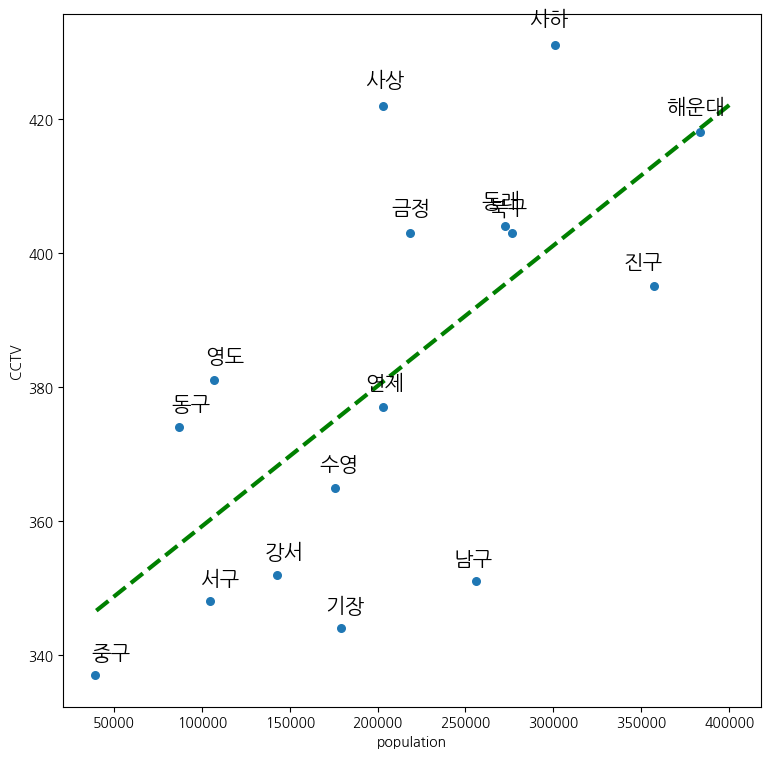

In [45]:
import numpy as np

# 선을 점 사이에 가깝게 붙이려고 쓰는 구문
fp1 = np.polyfit(total['population'],total['count'],1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)
plt.figure(figsize=(9,9))
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='g')

plt.scatter(total['population'],total['count'], s=30)
plt.xlabel('population')
plt.ylabel('CCTV')
plt.plot()
# 점마다 각 구의 이름(라벨)을 부여
for i in range(len(total['population'])):
    plt.text(total['population'].iloc[i]*0.95,total['count'].iloc[i]*1.007,total.index[i], fontsize=15)

plt.show()

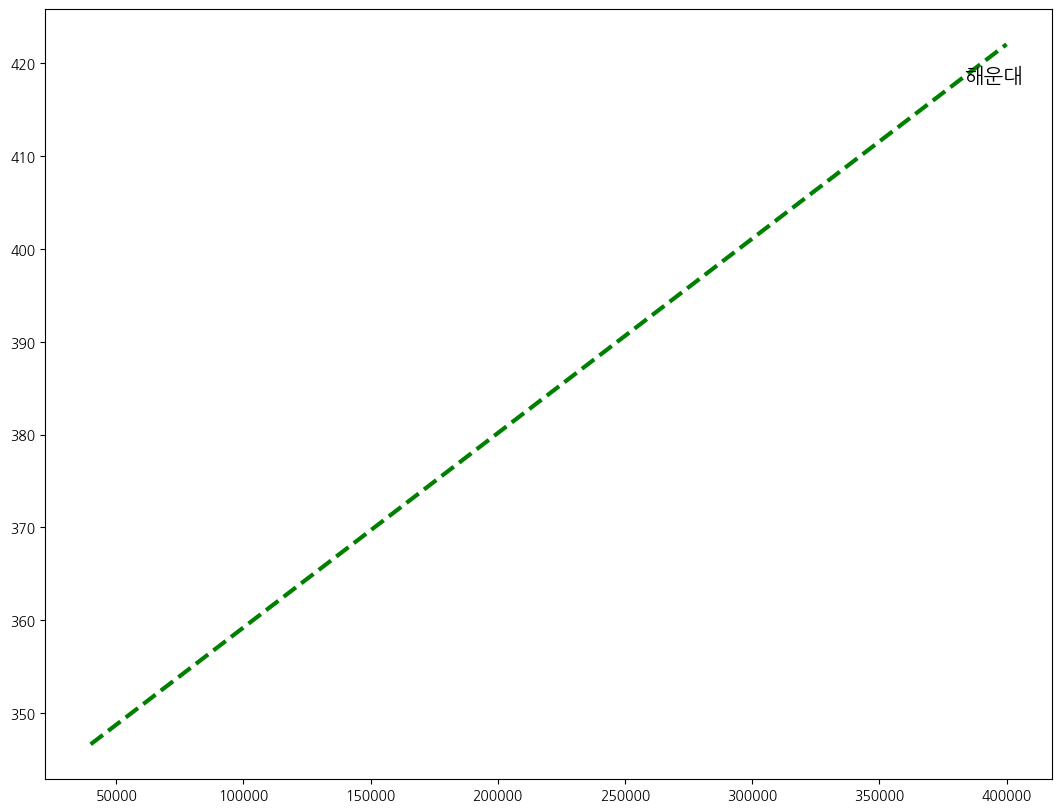

In [39]:
# total['local']
# total['count']
# total['population']
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))

plt.text(total['population'].iloc[0],total['count'].iloc[0],total.index[0], fontsize=15)
plt.plot(fx,f1(fx), ls='dashed', lw=3,color='g')
# for n in range (len(total['local']))

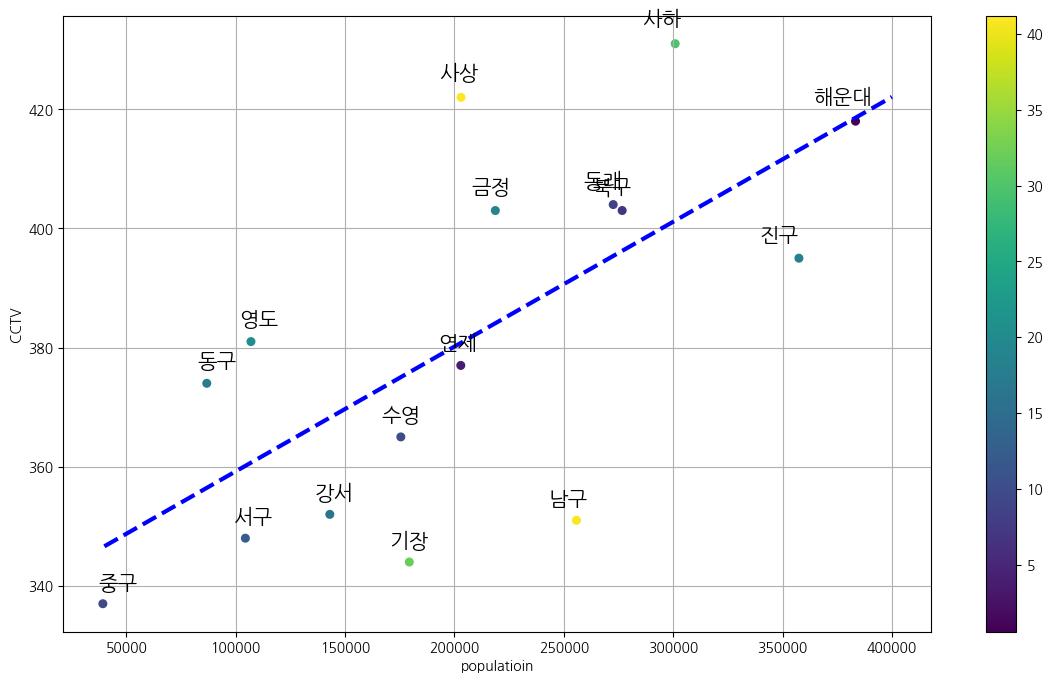

In [46]:
import numpy as np
fp1 = np.polyfit(total['population'],total['count'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)
plt.figure(figsize=(14,8))
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='b')

# 오차
total['err'] = np.abs(total['count'] - f1(total['population']))

plt.scatter(total['population'], total['count'], s= 30, c = total['err'])
plt.xlabel('populatioin')
plt.ylabel('CCTV')
plt.plot()

# 점마다 각 동의 이름을 부여
for i in range(len(total['population'])):
    plt.text(total['population'].iloc[i]*0.95, total['count'].iloc[i]*1.007, total.index[i], fontsize=15)
plt.grid()
plt.colorbar()
plt.show()  